Challenge Project Computational Prediction Tasks for Structure

Justin Ren

1. Introduction to 1MBN
    
    Sperm whale myoglobin (1MBN) is a monomeric oxygen-binding protein that is primarily found in muscle tissue. This protein is heavily involved in intracellular oxygen storage and transport and facilitates oxygen diffusion from the cell membrane to the mitochondria during periods of high metabolic demand. 1MBN functions through the binding and storage of oxygen in muscle cells and releases oxygen during muscle contraction when blood oxygen is limited. This protein has higher oxygen affinity than hemoglobin, making it an efficinet oxygen reservoir. Myoglobin was the first protein to have its three-dimensional structure determined by X-ray crystallography, making it a landmark in structural biology and a common model for studying protein folding and structure-function relationships.

2. Questions and "Need to Knows"

    Which strategy—Pairwise Sequence Alignment or Multiple Sequence Alignment—leads to better structure predictions? 

    - Multiple target sequences for testing 
 
    - Statistical significance of differences 

    - Sequence identity/similarity scores from each method 

    - Number of gaps introduced by each method 

    

    How does the presence (or lack thereof) of disulfide bonds contribute to protein stability? 

    - Structures with and without disulfide bonds 

    - Free energy of folding 

    - Thermal denaturation temperatures 

    - Hydrophobic core interactions, heme coordination, salt bridges 

    - B-factors from 1MBN crystal structure 

    - How to remove stabilizing interactions and determine impact 

    

    How can we demonstrate a relationship between protein structural and functional change due to mutations? 

    - 1MBN wild-type structure 

    - Known myoglobin mutations 

    - Heme binding site residues 

    - Changes in oxygen binding affinity (Kd values)

Computational Analysis Workflow

Part 1: Comparing Alignment Strategies for Structure Prediction

- We will use the NCBI Protein Data Bank (https://www.ncbi.nlm.nih.gov/) to gather FASTA sequences for myoglobin from different species. We will be looking for full-length sequences that are around the same length as 1MBN (154 Amino Acids). 

- Pairwise alignment will be conducted using EMBOSS Needle (https://www.ebi.ac.uk/jdispatcher/psa/emboss_needle). The alignment will be run under default dispatcher conditions, this can be verified by using the "More options" dropdown menu and comparing parameters.

    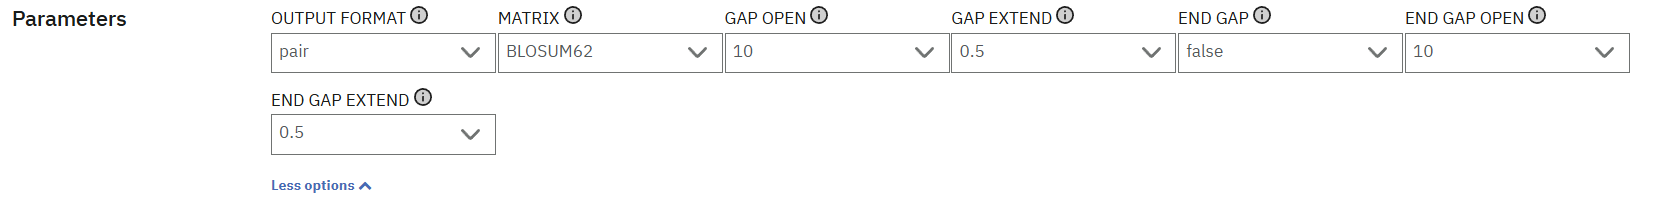

- An example output between 1MBN and Human Myoglobin can be seen below. Pairwise alignment has determined the two sequences to be 85.6% identical with 93.5% similarity. The difference in these two values can be attributed to the fact that some amino acids are similar enough in structure and property to be considered a conservative substitution. These substitutions are indicated with a ":" while identical amino acids are represented with "|". 

    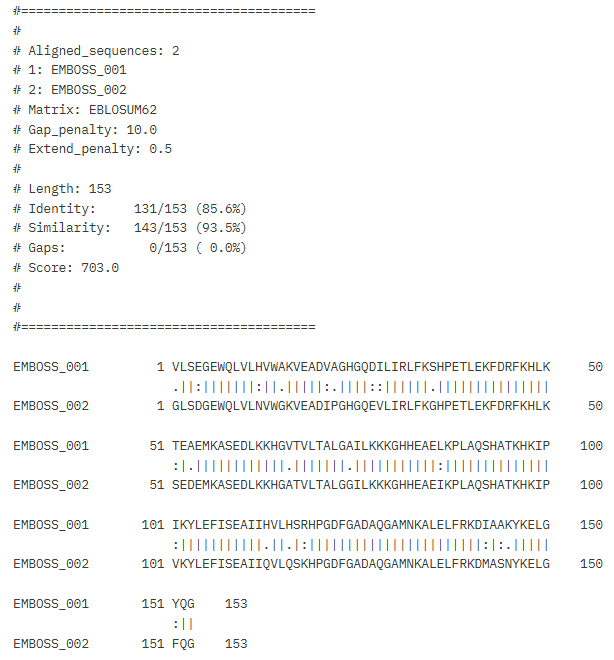

- We will conduct mutiple sequence alignment using MUSCLE (https://www.ebi.ac.uk/jdispatcher/msa/muscle). This comparison will use sequences that are closely evolutionarily related to sperm whales as well as sequences that are expected to be less similar. For this experiment specifically, we will be using: Chicken|NP_001161224.1, Seal|7DDU, Sperm Whale|5YZF, Yellowfin Tuna|1MYT, Human|NP_001369738.1, Pig|NP_999401.1, and Horse|NP_001157488.1.

- An example output for this particular set of sequences can be seen below. Multiple Sequence Alignment uses a similar system where "*" represents fully conserved residues, ":" represents residues with strongly similar properties, "." means residues with weak similar properties, and blank spaces " " are used for residues with no similarity.

    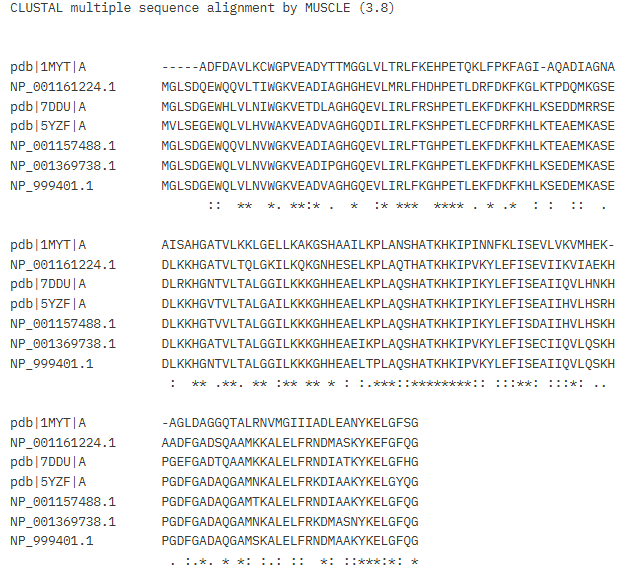

- In both alignments, gaps are represented with "-". There are considerations to be made about whether pairwise or multiple alignment introduces more gaps; for this particular protein of interest, only yellowfin tuna myoglobin (1MYT) had a significant difference in length that resulted in gaps. Otherwise, there was no need to introduce artificial gaps between sequences to improve the overall alignment. As such, it is difficult to use gap introduction as a criteria to assess alignment viability for this specific scenario.

    * Should I intentionally find a sequence of abnormal length to force gap penalty considerations? That is, is it inappropriate to primarily rely on sequences that are all 154 amino acids in length?

Part 2: Assessing Factors in Protein Stability

- We will use the UniProt database (https://www.uniprot.org/) to identify proteins that either have or do not have disulfide bonds. This can be easily filtered under the advanced search option. The dropdown menu chain goes All -> PTM/Processing -> Disulfide bond. The resulting list can then be further isolated to specific organisms, sequence lengths, annotation score etc. 

- We can then compare the free energy of folding of different proteins to assess the stability of said proteins. This value, denoted as ΔGfold, represents the stability of proteins in the given folding pattern. We would expect proteins that contain disulfide bonds to have a negative ΔGfold. Indeed, work done by Kuroki in 1992 found that proteins like lysozymes with 4 disulfide bonds have a ΔGfold of around -8 to -12 kcal/mol. In fact, for each disulfide bond lost, ΔGfold increased by around 4.6 kcal/mol - further reinforcing the fact that disulfide bonds have a stabilizing effect on protein folding (Kuroki, 1992). For 1MBN, experimental studies have found that ΔGfold is approximately -6 to -8 kcal/mol (Isogai, 2018). This negative value indicates that the folded state of 1MBN is thermodynamically favored over the unfolded state - even though the sequence in question lacks disulfide bonds. 

- We can extend this analysis by comparing the thermal denaturation temperatures (Tm) of these proteins. For sperm whale myoglobin in the holoprotein state, experimental values for Tm have been estimated at around 70-80 °C. Much of the variance in this value can be attributed to environmental differences in pH and buffers used. Notably, 1MBN in the apomyoglobin state without heme has a much lower Tm of 32 °C (Gulotta, 2003). This difference is significant enough that it cannot be simply attributed to environmental variance; this provides some insight to how the heme group helps to stabilize myoglobin in the abscence of disulfide bonds. In comparison, chicken lysozymes have Tm values that range from 60.9 to 77.3 °C. Differences in this value are the result of core mutations that impact hydrophobicity and packing volume (Shih, 1995).

- We can verify some of our assumptions regarding protein folding by looking at the B-factors for 1MBN. This data can be found in the mmCIF file that is associated with each structure. One issue with 1MBN lies in the fact that the protein structure was submitted so long ago that it does not properly list B-factor data in the mmCIF file. As such, we will be using 1MBO, a refined structure of myoglobin at 1.6 Angstroms to model this process. This information is listed under _atom_site.B_iso_or_equiv; a value between 40-80 Ų represents a high degree of flexibility that is associated with terminal atoms. Medium B-facotrs between 30-40 Ų are indicative of atoms with a lesser extent of flexibility such as surface loops and side-chain atoms. Lower B-factors at around 10-30 Ų can be attributed to core-residues that are rigid and well-packed to ensure functionality and stability. We can run a Python script to match up these B-values with conserved residues from MSA analysis.


In [5]:

#Code for comparing MSA and B-Factors, written with assistance from ChatGPT (OpenAi, 2003)

def parse_bfactors_from_mmcif(mmcif_file):
    """
    Parse mmCIF and return average B-factor per residue
    """
    residue_bfactors = {}  # {residue_number: [list of B-factors]}
    
    with open(mmcif_file, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                parts = line.split()
                res_num = int(parts[8])      # Residue sequence number
                bfactor = float(parts[14])    # B-factor value
                
                if res_num not in residue_bfactors:
                    residue_bfactors[res_num] = []
                residue_bfactors[res_num].append(bfactor)
    
    # Calculate averages
    avg_bfactors = {}
    for res_num, bfac_list in residue_bfactors.items():
        avg_bfactors[res_num] = sum(bfac_list) / len(bfac_list)
    
    return avg_bfactors

# Usage
bfactors = parse_bfactors_from_mmcif('1mbo.cif')

#Map to myoglobin sequence
myoglobin_sequence = "VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAAKYKELGYQG"
result = []
res_num = 1

for char in myoglobin_sequence:
    if char == '-':
        result.append(None)
    else:
        result.append(bfactors.get(res_num, None))
        res_num += 1

print(myoglobin_sequence)
print([round(x, 2) if x is not None else None for x in result])

###Need to work on spacing the output so that it's easier to line up each averaged B-factor with the corresponding residue


VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAAKYKELGYQG
[38.93, 15.34, 13.22, 19.42, 14.69, 14.12, 12.59, 24.14, 12.46, 9.12, 9.48, 20.41, 17.42, 13.73, 12.94, 19.77, 12.77, 17.23, 16.25, 13.6, 14.38, 13.64, 10.32, 10.45, 10.28, 20.7, 14.36, 6.51, 9.06, 13.08, 22.53, 10.82, 8.96, 23.44, 12.28, 11.77, 12.62, 11.42, 11.34, 14.4, 21.08, 16.51, 10.24, 23.6, 14.81, 11.16, 24.97, 12.25, 12.66, 29.49, 8.72, 12.14, 9.63, 11.92, 10.45, 22.49, 9.58, 8.61, 11.5, 9.17, 10.11, 14.7, 17.99, 12.56, 8.65, 9.23, 9.12, 7.31, 10.01, 13.3, 7.6, 8.53, 9.48, 10.91, 9.82, 10.38, 12.83, 19.52, 15.12, 12.29, 25.41, 13.1, 26.3, 16.8, 22.52, 18.13, 28.36, 14.31, 16.06, 10.07, 23.43, 9.65, 9.27, 13.13, 18.57, 28.86, 11.48, 27.19, 13.2, 14.12, 16.39, 13.2, 13.42, 12.25, 11.05, 10.8, 7.94, 6.85, 21.86, 11.53, 9.38, 14.03, 23.73, 12.05, 17.4, 26.91, 21.39, 21.05, 17.04, 25.86, 24.52, 30.66, 14.11, 15.72, 13.92, 16.64, 9

Part 3. Changes in Structure and Function Due to Mutations

- We will be looking at the wild-type structure for 1MBN using UCSF ChimeraX (https://www.rbvi.ucsf.edu/chimerax/). We can download the .cif file for 1MBN from the RCSB Protein Databank (https://www.rcsb.org/). Once opened, we can highlight secondary structures using "color /A & X Y" where X is the secondary structure in question (helix, sheet, strand) and Y is the color. In this case, we highlighted helices in blue and strands in gray - there are no beta sheets in 1MBN and thus nothing was highlighted. 

    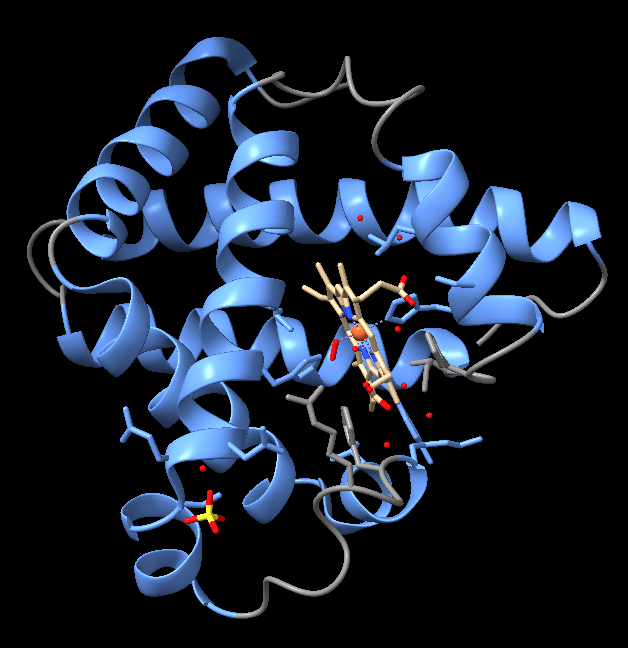

- We can also apply filters to the structure to validate our findings regarding B-factors. In particular, the structure for 1MBN shows markedly low B-factor values through the entire protein but especially near the heme group which is responsible for much of the protein function. This is in line with our Python output that shows many of the lowest values for B-factors in that region of the sequence.

    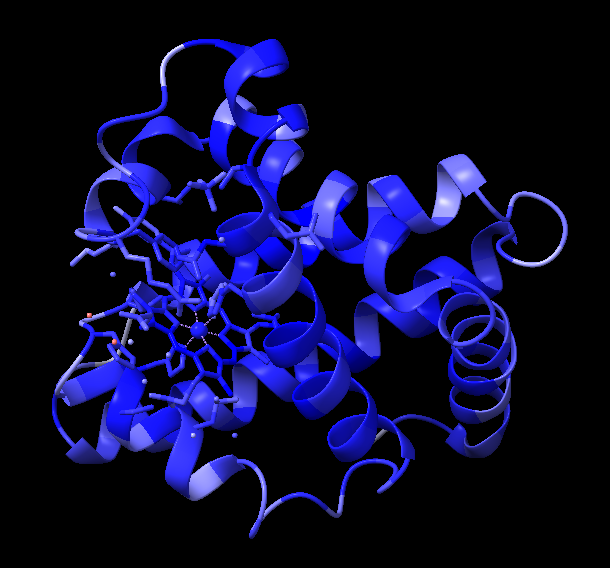

- We can further this analysis by looking at hydrophobicity through the protein using the corresponding filter. Once again, we can verify our earlier assumption that many of the hydrophobic amino acids are tightly nestled in a helical core. The hydrophilic residues, highlighted in cyan, are coating and protecting the core. 

    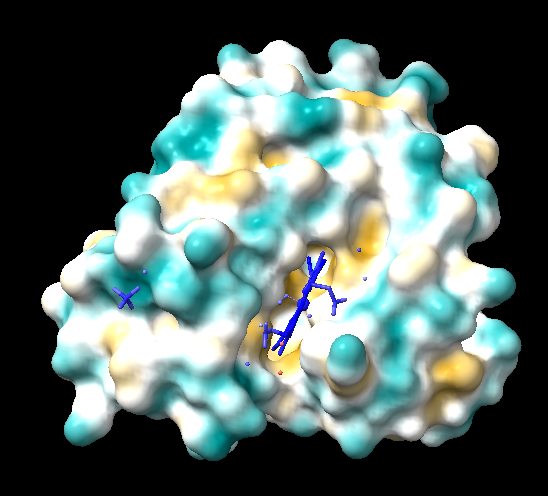

- We can compare this structure to a known mutant of 1MBN. 1CH3 has a mutation at Leu89 to various other amino acids like tryptophan that remove the hydrophobic barrier that normally protects the heme pocket. As a result of this, solvent can easily penetrate the pocket and cause dissociation. This leads to a >100-fold increase in the rate of hemin loss (Liong, 2001). We can highlight positions 88-90 in both 1MBN and 1CH3 while under the hydrophobicity filter and compare the difference in structure. We can see that the structure for 1CH3 is not actually that much less hydrophobic around this region; this is to be expected as leucine is normally a hydrophobic amino acid and tryptophan is also hydrophobic. When relating this change to Kd for oxygen binding affnity, work done by Liong highlight how not all mutations are equal. Wild-type myoglobin had a Kd ≈ 1 μM while the worst mutation of leucine to tryptophan had a Kd of approximately 4 μM. This 4-fold decrease in oxygen binding affinity can be attributed to the bulky tryptophan side chain that sterically hinders the heme pocket while also altering how easily oxygen can access the binding site. Overall, most mutants of 1MBN are comprised of point mutations near the heme group that do no significantly alter protein secondary structure. This is reinforced by our structural comparison between 1MBN and 1CH3 that otherwise have the same helices, strands, and lack of beta sheets. 

        1CH3
    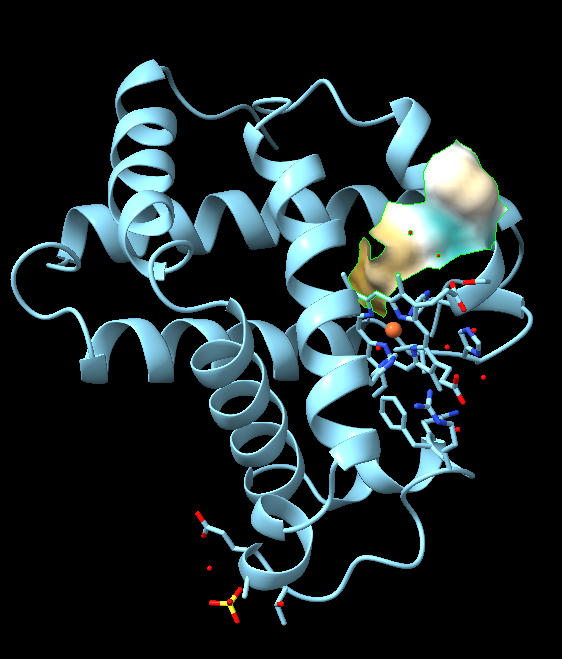

        1MBN
    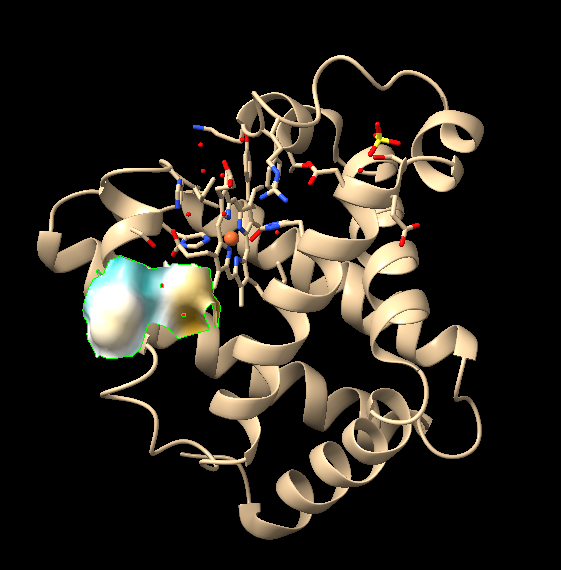


    

   

Results *Other results were discussed in the procedue ---- not sure if I should move this section up or move the other explanations down??

- There were only 51 fully conserved positions (*) in the MSA alignment of 7 myoglobin sequences. This translates to an overall % identity of merely 33.1% for an alignment length of 154 amino acids. We can extend this count using strong similar residues; including ":" gives a % similarity of 56.5% with 87 similar positions. Notably, the completely conserved residues across all 7 forms of myoglobin were predominantly comprised of hydrophobic amino acids such as Leu, Ile, Val, and Phe. These residues likely formed a helical core that was driven by the hydrophobic effect to bury themselves away from the aqueous environment. This serves as a strong structural scaffold that other proteins could fold around. However, this is not sufficient to fully explain the stability of myoglobin that lacks disulfide bridges. Another factor that was mentioned during Part 2 is the impact of heme coordination. This heme group is able to coordinate bonds that can cross-link secondary structure elements, much like disulfide bridges do. This is reinforced by the marked drop in Tm between holomyoglobin and apomyoglobin. 

Were my questions answered by my analysis?

- It is difficult to definitively conclude whether pairwise alignment or MSA is better at predicting structure based on the work done. Because all the sequences retrieved already had experimental structures that were well researched, aligning the sequences gave more insight regarding protein structure and function as opposed to prediction. For example, the MSA output helped to highlight highly conserved regions near the heme group in different animal myoglobins. Additionally, the sequences I used for alignment were extrodinarily close in length which minimized how I could use gap penalties to compare the two alignment methods. 

- Research regarding how proteins have different methods of stabilizing their structure was successful. Comparisons between disulfide bridge containing proteins like lysozymes and myoglobin helped to highlight the flexibility of stabilizing forces. In cases where disulfide bridges are not an option, other factors like a stable hydrophobic core accompanied by coordinating structures like heme groups are more than capable of creating a protein that has negative free energy of folding and high Tm. This was further reinforced by looking at B-factors across the protein to validate amino acid flexibility; important regions of the protein were adequately rigid to maintain structure and function with low B-factors that lined up with highly conserved regions across different myoglobin species.

- Mutations in myoglobin appear to more heavily impact function as opposed to structure. Almost all notable and well documented mutants were comprised of point mutations at core amino acids near the heme group that greatly impacted the proteins ability to binding and release oxygen. I was unable to find any stable mutants with adequate research that were missing helices or introduced new secondary structures like beta sheets. One of the ways that I measured change in protein function was by comparing the Kd for oxygen binding affinity to determine how mutations could degrade myoglobin. Results show that sterics are extremely important near the heme pocket - a mutation from leucine to glycine actually saw an increase in oxygen binding affinity while the bulky tryptophan observed a 4-fold decrease from baseline activity.

References:

Gulotta, M., Rogatsky, E., Callender, R. H., & Dyer, R. B. (2003). Primary folding dynamics of sperm whale apomyoglobin: core formation. Biophysical journal, 84(3), 1909–1918. https://doi.org/10.1016/S0006-3495(03)74999-6

Isogai, Y., Imamura, H., Nakae, S., Sumi, T., Kato, M., & Nishikawa, K. (2018). Tracing whale myoglobin evolution by resurrecting ancient proteins. Scientific Reports, 8, Article 16883. https://doi.org/10.1038/s41598-018-34984-6

Kuroki, R., Kawakita, S., Nakamura, H., & Yutani, K. (1992). Enthalpic destabilization of a mutant human lysozyme lacking a disulfide bridge between cysteine-77 and cysteine-95. Biochemistry, 31(35), 8323-8328. https://doi.org/10.1021/bi00150a028

Liong, E. C., Dou, Y., Scott, E. E., Olson, J. S., & Phillips, G. N., Jr. (2001). Waterproofing the heme pocket: Role of proximal amino acid side chains in preventing hemin loss from myoglobin. Journal of Biological Chemistry, 276(12), 9093–9100. https://doi.org/10.1074/jbc.M008593200

OpenAI. (2023). ChatGPT (August 7 version) [Large language model]. https://chat.openai.com/chat 

Shih, P., Holland, D. R., & Kirsch, J. F. (1995). Thermal stability determinants of chicken egg-white lysozyme core mutants: hydrophobicity, packing volume, and conserved buried water molecules. Protein science : a publication of the Protein Society, 4(10), 2050–2062. https://doi.org/10.1002/pro.5560041010